Лабораторна робота №5 ФІТ 4-6 Піць А.В.

Iris dataset (first 5 rows):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


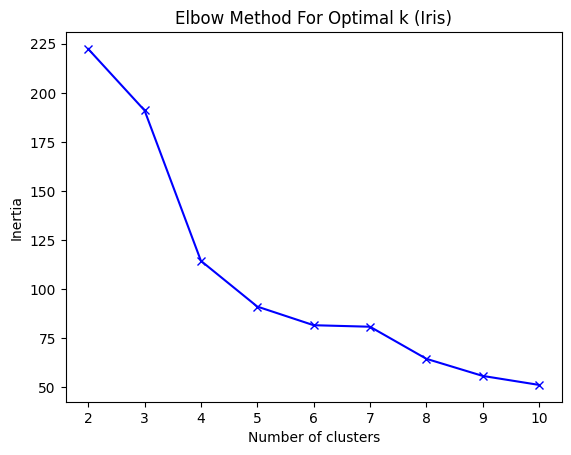

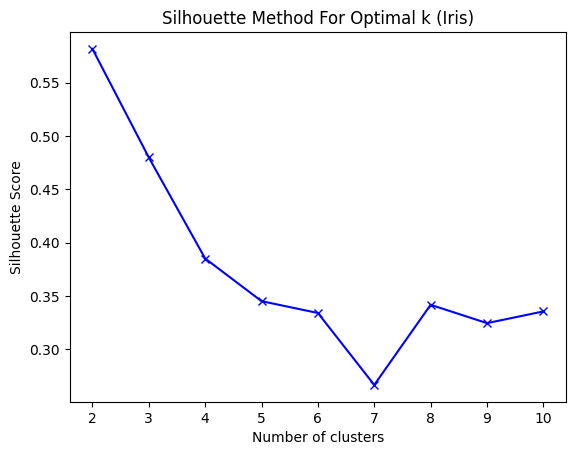

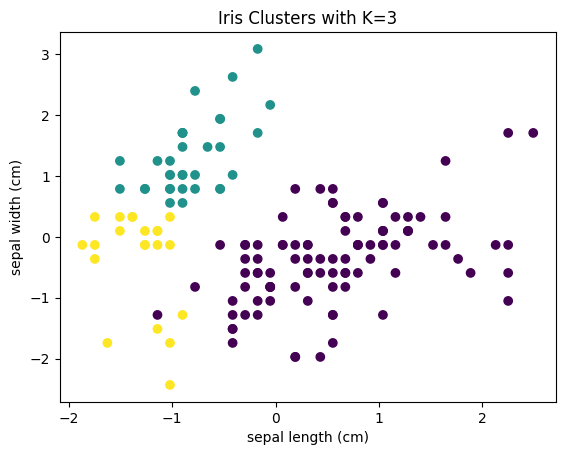


Tips dataset (first 5 rows):
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Shape of Tips dataset: (244, 7)
Data types:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Number of duplicates: 1

Descriptive statistics:
        total_bill         tip        size
count  243.000000  243.000000  243.000000
mean    19.813868    3.002387    2.572016
std      8.910071    1.385002    0.952356
min      3.070000    1.000000    1.000000
25%     13.380000    2.000000    2.000000
50%     17.810000    2.920000    2.000000
75%     24.175000    3.575000    3.000000
max     50.810000   10.000000    6.00

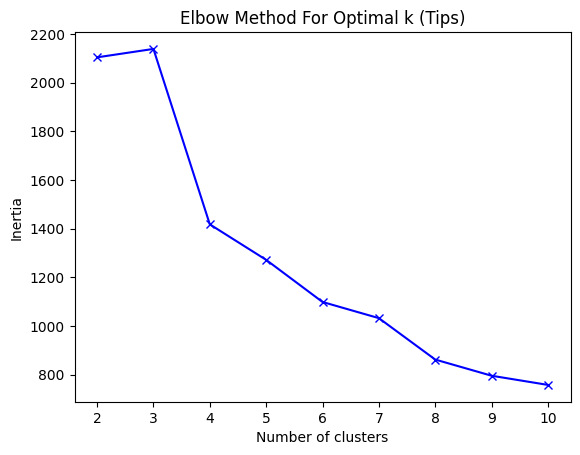

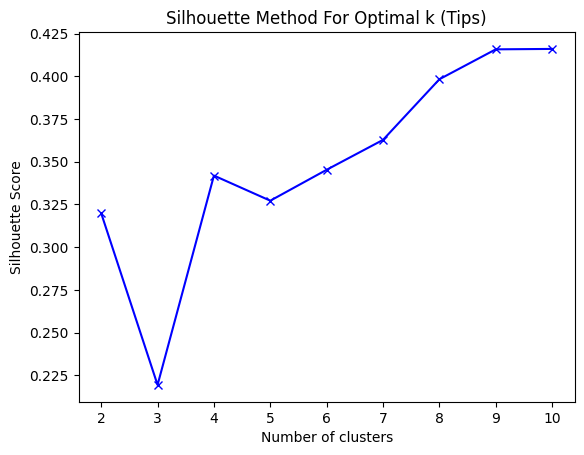

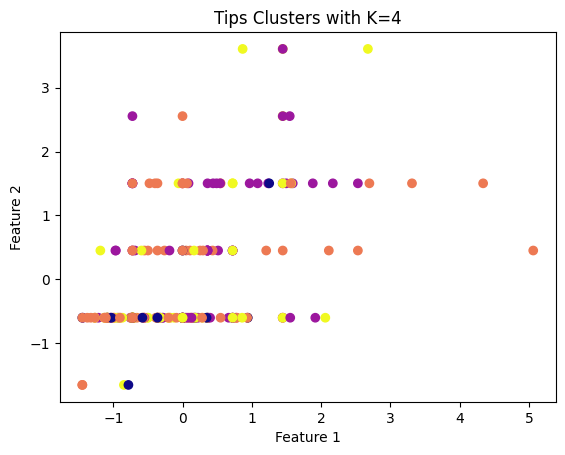

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Завдання 1: Завантаження датасету Iris
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Роздруковуємо перші 5 рядків датасету
print("Iris dataset (first 5 rows):\n", X_iris.head())

# Масштабуємо дані для кластеризації
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Метод ліктя та силуетів для визначення кількості кластерів
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_iris_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_iris_scaled, kmeans.labels_))

# Метод ліктя
plt.plot(range(2, 11), inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (Iris)')
plt.show()

# Метод силуетів
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k (Iris)')
plt.show()

# Оптимальна кількість кластерів для Iris - 3
optimal_k_iris = 3
kmeans_iris = KMeans(n_clusters=optimal_k_iris, random_state=42)
clusters_iris = kmeans_iris.fit_predict(X_iris_scaled)

# Візуалізація кластерів
plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=clusters_iris, cmap='viridis')
plt.title(f'Iris Clusters with K={optimal_k_iris}')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Завдання 2: Завантаження датасету Tips
df_tips = sns.load_dataset('tips')

# Роздруковуємо перші 5 рядків
print("\nTips dataset (first 5 rows):\n", df_tips.head())

# Опис датасету
print("\nShape of Tips dataset:", df_tips.shape)
print("Data types:\n", df_tips.dtypes)

# Перевірка на пропущені значення та заміна на середнє для числових стовпців
numeric_columns = df_tips.select_dtypes(include=['float64', 'int64']).columns
df_tips[numeric_columns] = df_tips[numeric_columns].fillna(df_tips[numeric_columns].mean())

# Перевірка на дублікати
print("\nNumber of duplicates:", df_tips.duplicated().sum())
df_tips = df_tips.drop_duplicates()

# Описова статистика
print("\nDescriptive statistics:\n", df_tips.describe())

# Перетворення категоріальних змінних на числові
df_tips_encoded = pd.get_dummies(df_tips)

# Регресійна задача (прогноз total_bill)
X_tips = df_tips_encoded.drop(columns=['total_bill'])
y_tips = df_tips_encoded['total_bill']

X_train, X_test, y_train, y_test = train_test_split(X_tips, y_tips, test_size=0.2, random_state=42)

# Лінійна регресія
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f"\nLinear Regression MSE (Tips): {mean_squared_error(y_test, lr_pred)}")

# Випадковий ліс
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"Random Forest MSE (Tips): {mean_squared_error(y_test, rf_pred)}")

# Ridge регресія
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print(f"Ridge Regression MSE (Tips): {mean_squared_error(y_test, ridge_pred)}")

# Кластеризація (метод ліктя та силуетів для Tips)
X_tips_scaled = scaler.fit_transform(X_tips)
inertia_tips = []
silhouette_scores_tips = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tips_scaled)
    inertia_tips.append(kmeans.inertia_)
    silhouette_scores_tips.append(silhouette_score(X_tips_scaled, kmeans.labels_))

# Метод ліктя для Tips
plt.plot(range(2, 11), inertia_tips, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (Tips)')
plt.show()

# Метод силуетів для Tips
plt.plot(range(2, 11), silhouette_scores_tips, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k (Tips)')
plt.show()

# Оптимальна кількість кластерів для Tips - 4
optimal_k_tips = 4
kmeans_tips = KMeans(n_clusters=optimal_k_tips, random_state=42)
clusters_tips = kmeans_tips.fit_predict(X_tips_scaled)

# Візуалізація кластерів Tips
plt.scatter(X_tips_scaled[:, 0], X_tips_scaled[:, 1], c=clusters_tips, cmap='plasma')
plt.title(f'Tips Clusters with K={optimal_k_tips}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Висновок: Кластеризація (Iris): Використовуючи метод ліктя і метод силуетів, оптимальна кількість кластерів для датасету Iris була визначена як 3, що відповідає реальному розподілу квітів в датасеті.
Регресія (Tips): Було побудовано кілька регресійних моделей для прогнозування загальної суми рахунку в датасеті Tips. Модель випадкового лісу показала найкращий результат з найменшою помилкою.
Кластеризація (Tips): Для датасету Tips оптимальна кількість кластерів була визначена як 4, використовуючи методи ліктя і силуетів.